<a href="https://colab.research.google.com/github/RishabhKedia10/delving-into-RandomForest/blob/main/notebooks/Basic-RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.090047,0.784582,1.576014,2.261665,2.634914,1
1,1.728298,-0.473359,1.338293,-0.231790,0.749606,1
2,-1.402612,-0.592440,-0.139526,-0.117508,-2.653684,0
3,-0.731037,-2.003569,0.776068,0.336913,-1.366616,0
4,3.673869,-3.928532,2.998857,-0.542284,-1.040930,1


In [ ]:
# our model will have 3 decision trees

## 1. Row Sampling

In [ ]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
df1 = sample_rows(df,0.2)
df1.shape

(20, 6)

In [ ]:
df2 = sample_rows(df,0.2)
df2.shape

(20, 6)

In [ ]:
df3 = sample_rows(df,0.2)
df3.shape

(20, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 0.503\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

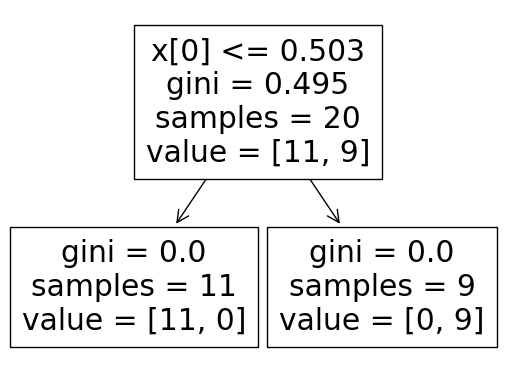

In [ ]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[4] <= 0.015\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6, 0.5, 'x[2] <= -2.448\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

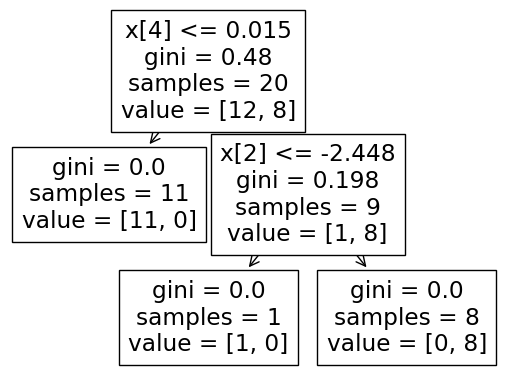

In [ ]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= -0.121\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

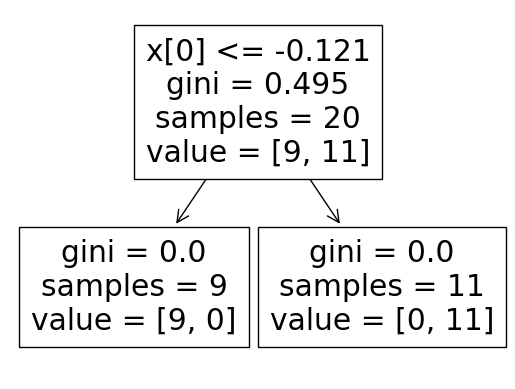

In [ ]:
plot_tree(clf3)

In [ ]:
input_data = np.array([-1.352825, 1.452538, 1.511808, 0.160762, -3.319573]).reshape(1, 5)
input_df = pd.DataFrame(input_data, columns=['col1', 'col2', 'col3', 'col4', 'col5'])

In [ ]:
clf1.predict(input_df)

array([0])

In [ ]:
clf2.predict(input_df)

array([0])

In [ ]:
clf3.predict(input_df)

array([0])

## 2. Feature Sampling

In [ ]:
import random

In [ ]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
df1 = sample_features(df,0.8)
df1.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

In [ ]:
df2 = sample_features(df,0.8)
df2.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

In [ ]:
df3 = sample_features(df,0.8)
df3.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col4', 'col1', 'col3', 'target'], dtype='object')
Index(['col2', 'col3', 'col5', 'col4', 'target'], dtype='object')
Index(['col5', 'col2', 'col3', 'col4', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.9285714285714286, 'x[2] <= -0.131\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3076923076923077, 0.7857142857142857, 'x[1] <= 2.97\ngini = 0.183\nsamples = 49\nvalue = [44, 5]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[2] <= -0.379\ngini = 0.087\nsamples = 44\nvalue = [42, 2]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.23076923076923078, 0.5, 'x[0] <= -0.785\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.15384615384615385, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.46153846153846156, 0.6428571428571429, 'x[3] <= -1.712\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.38461538461538464, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5384615384615384, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8461538461538461, 0.7857142857142857, 'x[0] <= -1

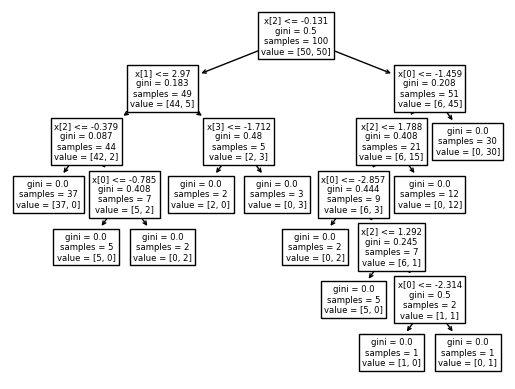

In [ ]:
plot_tree(clf1)

[Text(0.5277777777777778, 0.9, 'x[2] <= 0.179\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2777777777777778, 0.7, 'x[1] <= 1.308\ngini = 0.344\nsamples = 59\nvalue = [46, 13]'),
 Text(0.1111111111111111, 0.5, 'x[2] <= -0.375\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.16666666666666666, 0.3, 'x[3] <= 1.487\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.5, 'x[3] <= -0.806\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.3888888888888889, 0.3, 'x[1] <= 2.446\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'

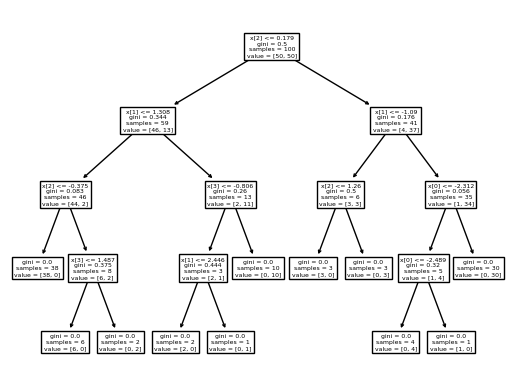

In [ ]:
plot_tree(clf2)

[Text(0.5277777777777778, 0.9, 'x[0] <= 0.179\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2777777777777778, 0.7, 'x[2] <= 1.308\ngini = 0.344\nsamples = 59\nvalue = [46, 13]'),
 Text(0.1111111111111111, 0.5, 'x[0] <= -0.375\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.16666666666666666, 0.3, 'x[3] <= 1.487\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.5, 'x[3] <= -0.806\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.3888888888888889, 0.3, 'x[2] <= 2.446\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'

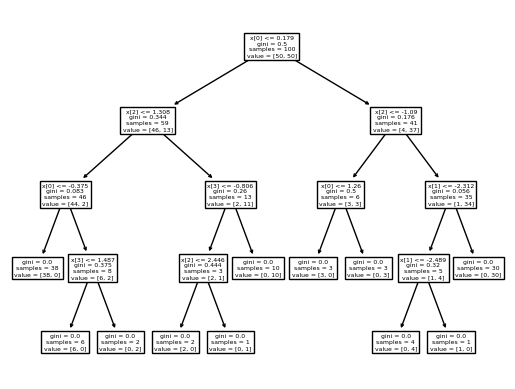

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-1.352825, 1.452538, 1.511808, 0.160762]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-1.352825, 1.452538, 1.511808, 0.160762]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([-1.352825, 1.452538, 1.511808, 0.160762]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## 3. Combined Sampling

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [ ]:
df1 = combined_sampling(df,0.5,0.5)
df1.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(50, 3)

In [ ]:
df2 = combined_sampling(df,0.5,0.5)
df2.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(50, 3)

In [ ]:
df3 = combined_sampling(df,0.5,0.5)
df3.shape

<ipython-input-20-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(50, 3)

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col4', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9375, 'x[0] <= 0.578\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2222222222222222, 0.8125, 'x[1] <= -0.932\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(0.1111111111111111, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.6875, 'x[0] <= -1.394\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.2222222222222222, 0.5625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4444444444444444, 0.5625, 'x[0] <= -1.131\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.4375, 'x[1] <= 3.055\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.4444444444444444, 0.3125, 'x[1] <= 0.304\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.3333333333333333, 0.1875, 'x[1] <= 0.123\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0

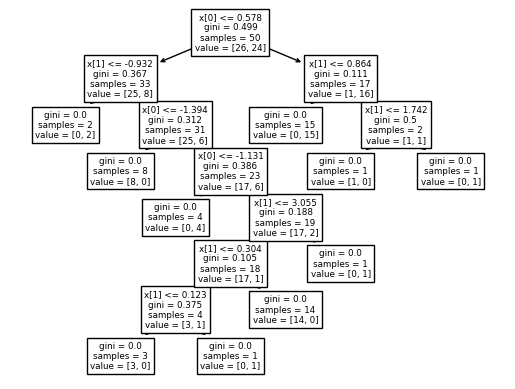

In [ ]:
plot_tree(clf1)

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.34\ngini = 0.435\nsamples = 50\nvalue = [16, 34]'),
 Text(0.2, 0.7857142857142857, 'x[0] <= -0.959\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3, 0.6428571428571429, 'x[1] <= -1.283\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0.5, 'x[0] <= 0.105\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.3, 0.35714285714285715, 'x[0] <= -0.375\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.2, 0.21428571428571427, 'x[1] <= 0.292\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.78571

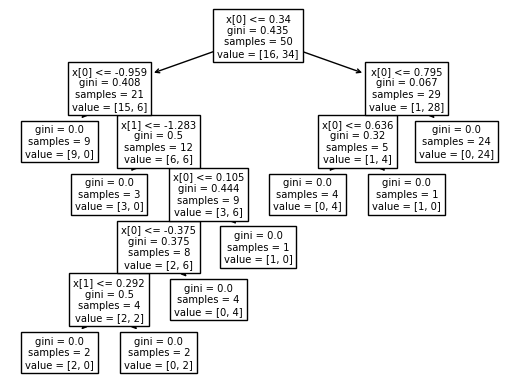

In [ ]:
plot_tree(clf2)

[Text(0.2727272727272727, 0.9444444444444444, 'x[1] <= 0.341\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.18181818181818182, 0.8333333333333334, 'x[0] <= -2.925\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.09090909090909091, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.7222222222222222, 'x[1] <= -1.567\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.36363636363636365, 0.6111111111111112, 'x[1] <= -1.147\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(0.18181818181818182, 0.5, 'x[0] <= -1.241\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.09090909090909091, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5454545454545454, 0.5, 'x[1] <= -0.618\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(

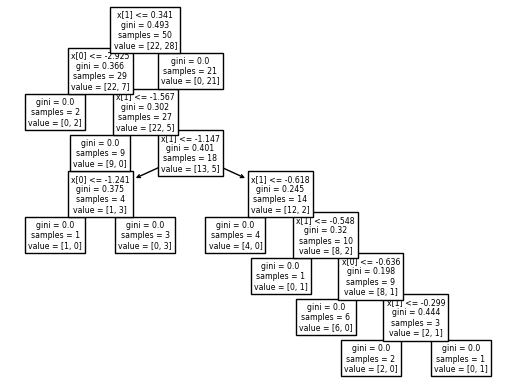

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-1.352825, 1.452538]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-1.352825, 1.452538]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-1.352825, 1.452538]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])